In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) +  0.1) 
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

In [4]:

xs = tf.placeholder(tf.float32,[None, 1])
ys = tf.placeholder(tf.float32,[None, 1])


l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
predition = add_layer(l1, 10, 1, activation_function=None)

loss =  tf.reduce_mean(tf.reduce_sum(tf.square(ys - predition), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


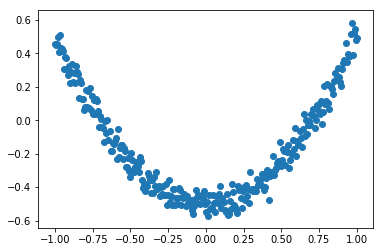

In [5]:
% matplotlib inline
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()
        

for i in range(1000):    
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
#         print(sess.run(loss,feed_dict={xs: x_data, ys: y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(predition, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r',lw=5)         
        plt.pause(0.1)

     

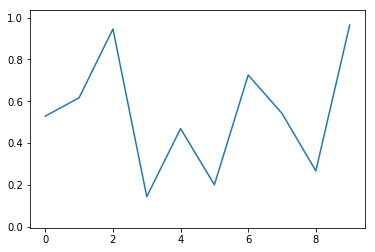

In [49]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.animation as animation  
   
fig = plt.figure()  
axes1 = fig.add_subplot(111)  
line, = axes1.plot(np.random.rand(10))  
   
#因为update的参数是调用函数data_gen,所以第一个默认参数不能是framenum  
def update(data):  
    line.set_ydata(data)  
    return line,  
# 每次生成10个随机数据  
def data_gen():  
    while True:  
        yield np.random.rand(10)  
   
ani = animation.FuncAnimation(fig, update, data_gen, interval=2*1000)  
plt.show()